### Preliminary steps.

In [1]:
# Supress Warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import important libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# # Jupyter Notebook will display all rows and columns this way. Use ctrl+/ to comment/un-comment.

# from IPython.display import display
# pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# # Check the encoding of data. Use ctrl+/ to comment/un-comment.

# import chardet

# rawdata = open('CarPrice_Assignment.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)
# print(result) # It's ascii with 100% confidence.

In [5]:
# Read csv data.

df = pd.read_csv('CarPrice_Assignment.csv', encoding='ascii')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


No null values in any of the columns. See output of `df.info()`.

In [6]:
print(len(df.drop_duplicates().index) == len(df.index)) # Check for duplicate rows.
df.columns.nunique() == len(df.columns) # Check for duplicate columns.

True


True

Hence, no duplicate rows or columns.<br> <b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>
## 1. Data Cleaning/EDA.
<font size=4>a. For object-type columns.</font>

Create a column dictionary with keys as their data-types.

In [7]:
grp = df.columns.to_series().groupby(df.dtypes).groups
col_dict = {key.name: value for key, value in grp.items()}
col_dict['object'] # Output of < type(col_dict['object']) > will be pandas.core.indexes.base.Index

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

First we will lower-case or upper-case all the object data-type columns.

In [8]:
df[col_dict['object']] = df[col_dict['object']].apply(lambda x: x.str.lower())
df[col_dict['object']].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


According to problem statement, we only need the comany of car as a variable for model building.

In [9]:
df['CarName'] = df['CarName'].str.split(expand=True)
df['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [10]:
df['CarName'].value_counts().sort_index(ascending = True)

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarName, dtype: int64

We have some spelling mistakes. `maxda` = `mazda`, `porcshce` = `porsche`, `toyouta` = `toyota`, `vokswagen` and `vw` = `volkswagen`. 

In [11]:
# Make the spell-mistake dictionary.
spell_mistake = {'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}

# Correct those mistakes.
df = df.replace({'CarName': spell_mistake})

See the car prices and car companies box-plot.

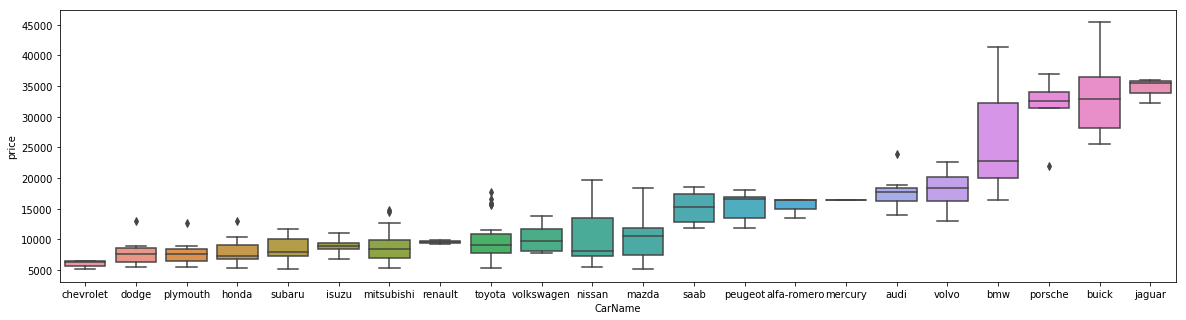

In [12]:
# I want car-companies with lower mean-prices to be displayed first.
mean_price = df.groupby('CarName')['price'].mean().sort_values()
order = mean_price.index

plt.figure(figsize=(20,5))
sns.boxplot(x='CarName', y='price', data=df, order=order)

It is clear that we have 3 Car statuses. premium, sub-premium and ordinary. See the x-tick labels. chevrolet to mazda is ordinary. saab to volvo is sub-premium. bmw to jaguar is premium. <b>We can create a derived variable now.

In [13]:
mean_price = mean_price.reset_index()
mean_price

,CarName,price
0,chevrolet,6007.000000
1,dodge,7875.444444
2,plymouth,7963.428571
3,honda,8184.692308
4,subaru,8541.250000
5,isuzu,8916.500000
6,mitsubishi,9239.769231
7,renault,9595.000000
8,toyota,9885.812500
9,volkswagen,10077.500000


It can be seen above that index 0 to 11 is ordinary, index 12 to 17 is sub-premium and index 18 to 21 is premium.

In [14]:
# Creating new-column that categorizes price-range of car.
mean_price['CarPriceRange'] = 'ordinary'
mean_price['CarPriceRange'][12:18] = 'sub-premium'
mean_price['CarPriceRange'][18:] = 'premium'

In [15]:
# Creating a dictionary with key as car-name and value as it's price-range category.
keys = mean_price['CarName']
values = mean_price['CarPriceRange']
car_dict = dict(zip(keys, values))
#car_dict

In [16]:
# Creating a new column `CarPriceRange` as an exact replica `CarName`.
df['CarPriceRange'] = df['CarName']

# Replacing Car names with it's price range category.
df = df.replace({'CarPriceRange': car_dict})
#df['CarPriceRange']

In [17]:
# Selecting every other column-name (object-type) other than `CarName`.
col_new = col_dict['object'][col_dict['object']!='CarName'] 

# Printing out value_counts of all the variables in col_new.
for val in col_new:
    print(df[val].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


Many categories have such sparse data, only 1 entry. Creating their dummy variable must be of no use. <b>Will deal with them later.

I guess, higher number of cylinders means higher price of car. 

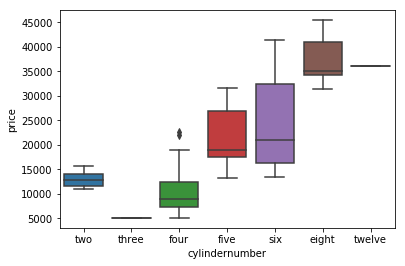

In [18]:
order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
sns.boxplot(y='price', x='cylindernumber', data=df, order=order)

We have very less data for two, three and twelve number of cylinders, that's why they don't seem to follow the pattern. But yes, the generalization about car price and number of cylinders correlation stands true. Therefore, I am going to convert it to a numerical type column rather than object type.

In [19]:
cyl_num = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df = df.replace({'cylindernumber': cyl_num})

<font size=4>b. For numeric-type columns.</font>

In [20]:
pd.set_option('display.precision', 2) # Will only show values till 2-decimal places.
df.describe() # Statistical-snapshot of numerical data.

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,4.38,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,1.08,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,4.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,4.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


`symboling` is a categorical variable. Read data-dictionary.

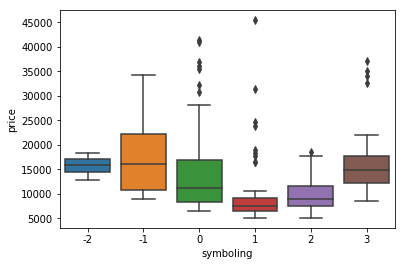

In [21]:
sns.boxplot(x='symboling', y='price', data=df)

Creating a derived variable `symboling_cat`.

In [22]:
# Creating 3 categories out of symboling.
symboling_dict = {-3:'v.safe', -2:'v.safe', -1:'v.safe', 0:'safe', 1:'safe', 2:'unsafe', 3:'unsafe'}

df['symboling_cat'] = df['symboling']
df = df.replace({'symboling_cat': symboling_dict})
#df['symboling_cat']

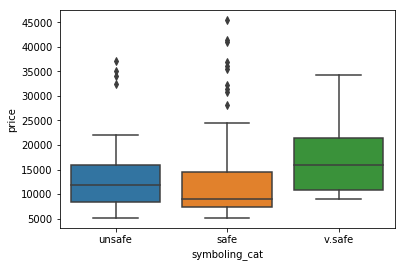

In [23]:
sns.boxplot(x='symboling_cat', y='price', data=df)

<font size=3>b.1. Visualizing int-type columns.</font>

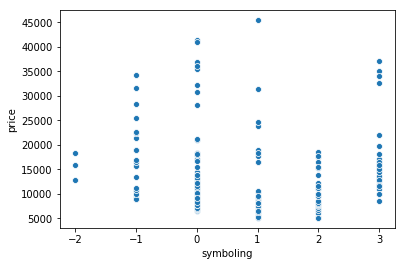

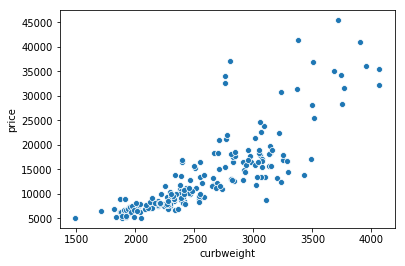

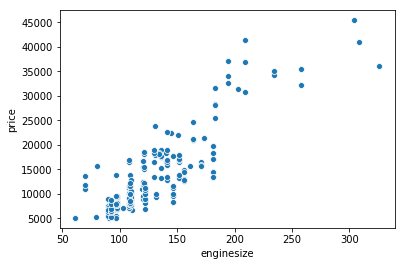

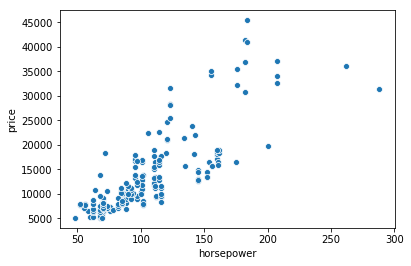

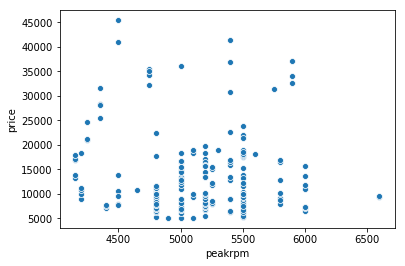

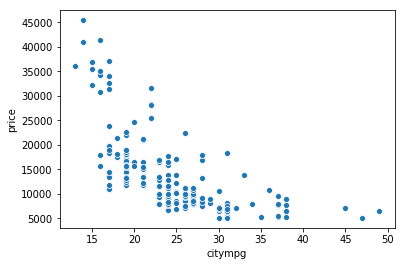

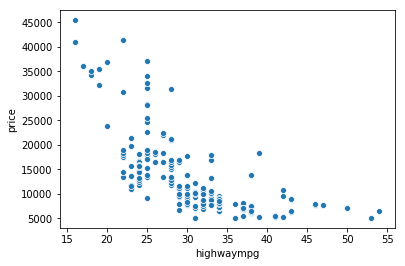

In [24]:
int_col = col_dict['int64'][1:]
i = 0
for val in int_col:
    plt.figure(i)
    sns.scatterplot(x=val, y='price', data=df)
    i=i+1

A little curve-pattern can be seen for `highwaympg` and `citympg`.

In [25]:
# Straightening the curve by taking inverse.
df['highwaympg_inv'] = df['highwaympg'].apply(lambda x:(x**-1))
df['citympg_inv'] = df['citympg'].apply(lambda x:x**-1)

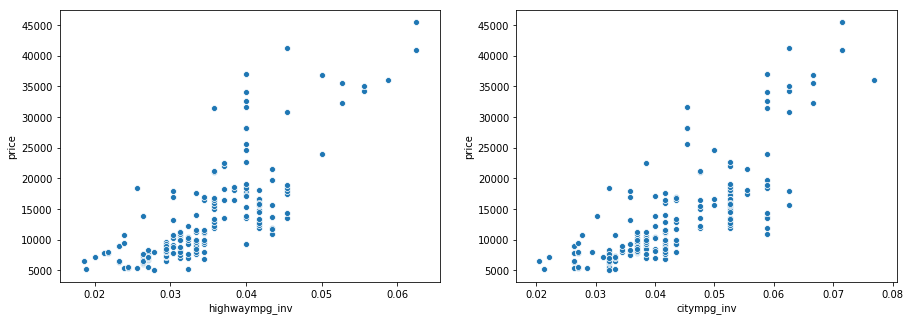

In [26]:
plt.figure(1, figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='highwaympg_inv', y='price', data=df)
plt.subplot(122)
sns.scatterplot(x='citympg_inv', y='price', data=df)

Columns selected for modeling are.

In [27]:
int_cols = ['curbweight', 'enginesize', 'horsepower', 'highwaympg_inv', 'citympg_inv', 'cylindernumber']

<font size=3> b.2. Visualizing float-type columns.

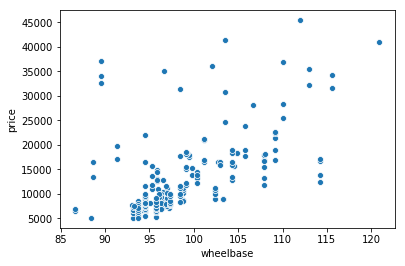

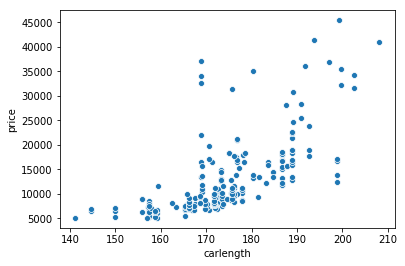

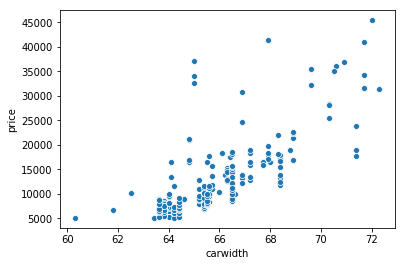

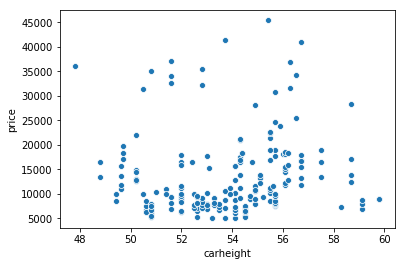

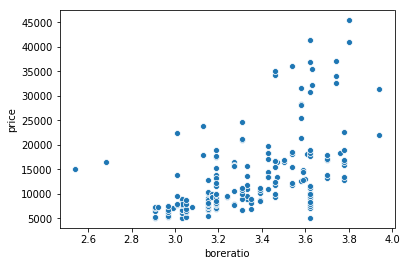

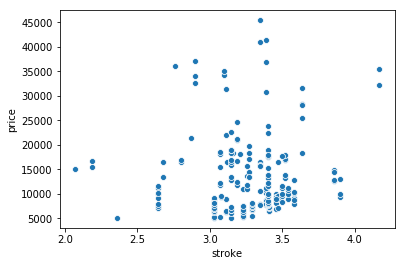

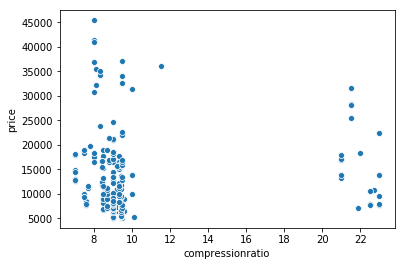

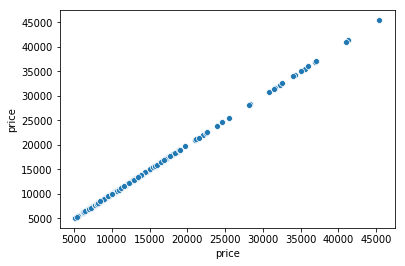

In [28]:
float_col = col_dict['float64']
i = 0
for val in float_col:
    plt.figure(i)
    sns.scatterplot(x=val, y='price', data=df)
    i=i+1

Columns selected for modeling are.

In [29]:
float_cols = ['wheelbase', 'carwidth', 'boreratio']

In [30]:
# `carlength` not selected, because it is highly correlated with `carwidth`.
df['carwidth'].corr(df['carlength'])

0.841118268481846

In [31]:
numeric_cols = int_cols + float_cols
numeric_cols.append('price')
#numeric_cols

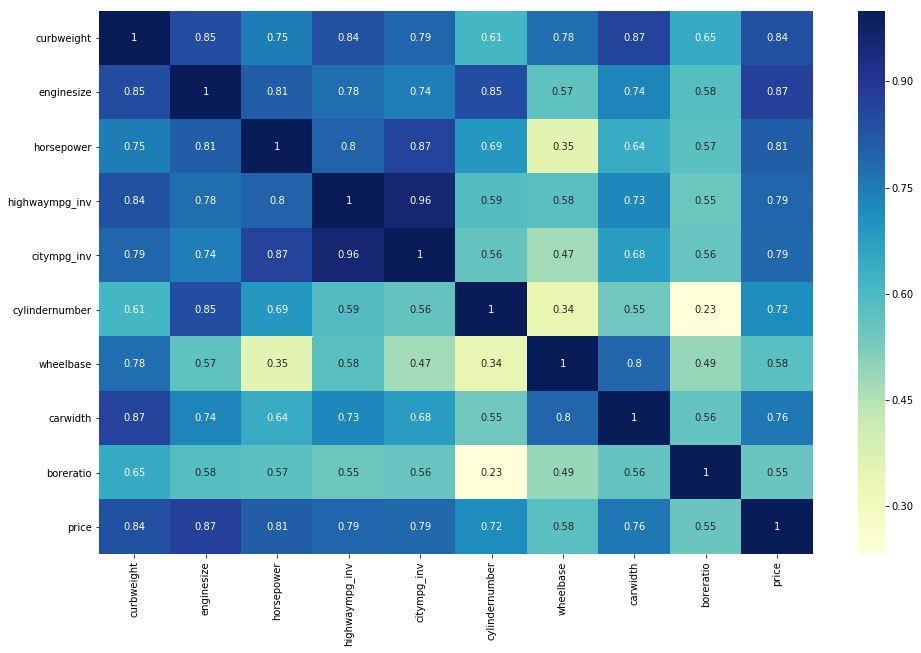

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated.
plt.figure(figsize = (16, 10))
sns.heatmap(df[numeric_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

If i were to choose one variable to explain `price`, it would be `enginesize`. It has high correlation with other variables as well. If i had to select two more variables, they would be `boreratio` and `wheelbase` as they are somewhat less correlated to `enginesize` on comparing with other variables.

<b>On second thought, if i were to show this model to marketing team, i would include`horsepower` and `wheelbase` in my model.  As, the common-man is most familiar about these variables.

<font size=3> Now we have to deal with the object-type columns.</font>

In [33]:
# Creating groups by data-type again, as I had made some changes and derived variables.
grp = df.columns.to_series().groupby(df.dtypes).groups
col_dict = {key.name: value for key, value in grp.items()}
obj_col = col_dict['object']

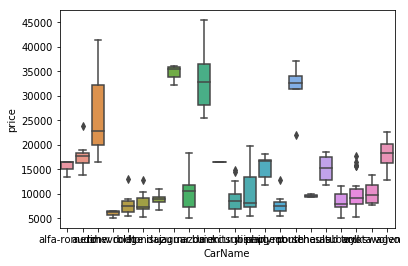

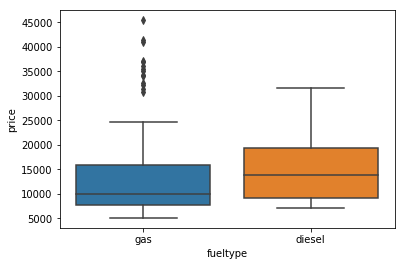

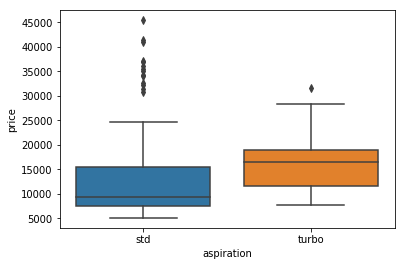

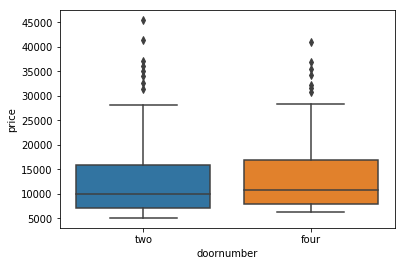

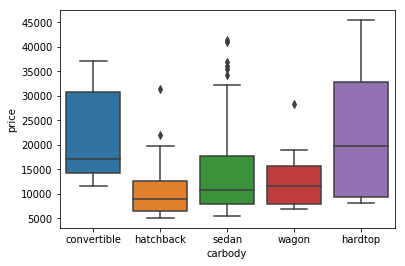

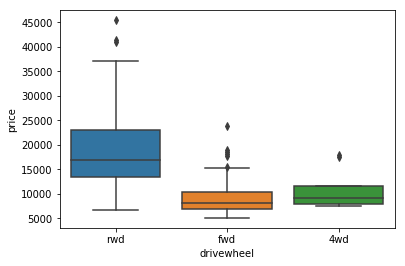

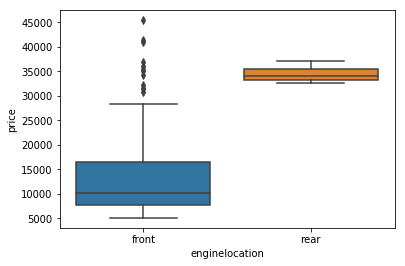

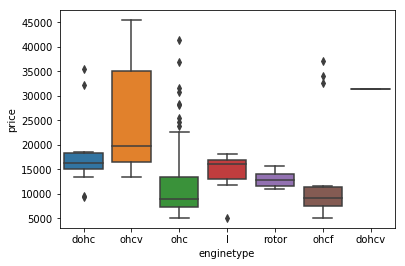

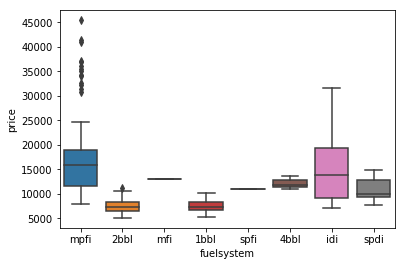

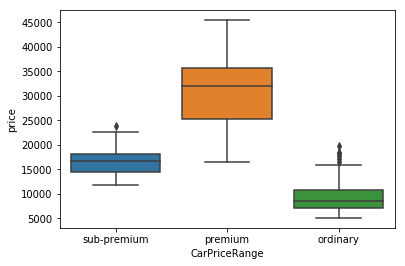

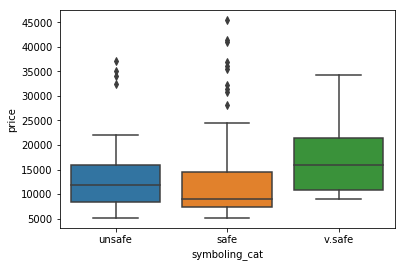

In [34]:
i = 0
for col in obj_col:
    plt.figure(i)
    sns.boxplot(x=col, y='price', data=df)
    i = i+1

Let's do binary encoding for variables with two categories.

In [35]:
df['fueltype_isdiesel'] = df['fueltype'].apply(lambda x: 1 if x=='diesel' else 0)
df['aspiration_isturbo'] = df['aspiration'].apply(lambda x: 1 if x=='turbo' else 0)
# `doornumber` seems not to affect price, hence not including it.
df['enginelocation_isrear'] = df['enginelocation'].apply(lambda x: 1 if x=='rear' else 0)
df['aspiration_isturbo'] = df['aspiration'].apply(lambda x: 1 if x=='turbo' else 0)

Let's deal with rest of the categorical variables now.

In [36]:
carbody = (pd.get_dummies(df['carbody'])).drop(labels=['hatchback'], axis=1)
df = pd.concat([df, carbody], axis = 1)
drivewheel = (pd.get_dummies(df['drivewheel'])).drop(labels=['4wd'], axis=1)
df = pd.concat([df, drivewheel], axis = 1)
enginetype = (pd.get_dummies(df['enginetype'])).drop(labels=['dohcv'], axis=1)
df = pd.concat([df, enginetype], axis = 1)
fuelsystem = (pd.get_dummies(df['fuelsystem'])).drop(labels=['spfi'], axis=1)
df = pd.concat([df, fuelsystem], axis = 1)
CarPriceRange = (pd.get_dummies(df['CarPriceRange'])).drop(labels=['ordinary'], axis=1)
df = pd.concat([df, CarPriceRange], axis = 1)
symboling_cat = (pd.get_dummies(df['symboling_cat'])).drop(labels=['unsafe'], axis=1)
df = pd.concat([df, symboling_cat], axis = 1)

In [37]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarPriceRange,symboling_cat,highwaympg_inv,citympg_inv,fueltype_isdiesel,aspiration_isturbo,enginelocation_isrear,convertible,hardtop,sedan,wagon,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,premium,sub-premium,safe,v.safe
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,sub-premium,unsafe,0.04,0.05,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,sub-premium,unsafe,0.04,0.05,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,sub-premium,safe,0.04,0.05,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,sub-premium,unsafe,0.03,0.04,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,sub-premium,unsafe,0.05,0.06,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [38]:
# Encoded categorical-columns list.
enc_cat_cols = ['fueltype_isdiesel', 'aspiration_isturbo',
       'enginelocation_isrear', 'convertible', 'hardtop', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'premium', 'sub-premium',
       'safe', 'v.safe']
len(enc_cat_cols)

26

<br> <b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>
## 2. Model Building.

<font color='red'><b>The following model is built just to identify important categoical features only.

In [39]:
# Creating a data-frame with only-encoded categorical features and corresponding price.
df_cat = pd.concat([df[enc_cat_cols],df['price']], axis=1)
df_cat.head()

,fueltype_isdiesel,aspiration_isturbo,enginelocation_isrear,convertible,hardtop,sedan,wagon,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,premium,sub-premium,safe,v.safe,price
0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,13495.0
1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,16500.0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,16500.0
3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,13950.0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,17450.0


In [40]:
# We will rescale the features using Min-Max Scaling technique, as it is good-practice.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
df_cat[:] = scaler.fit_transform(df_cat[:])

E:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [42]:
# I have not done train-test split as this is not a final model. It is only to identify important categorical features.
y_train = df_cat.pop('price')
X_train = df_cat

Recursive Feature Elimination will identify important variables.

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 5) # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
# ranking of important features.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype_isdiesel', False, 16),
 ('aspiration_isturbo', False, 8),
 ('enginelocation_isrear', True, 1),
 ('convertible', False, 11),
 ('hardtop', False, 12),
 ('sedan', False, 20),
 ('wagon', False, 21),
 ('fwd', False, 10),
 ('rwd', False, 22),
 ('dohc', False, 15),
 ('l', False, 3),
 ('ohc', False, 4),
 ('ohcf', False, 5),
 ('ohcv', True, 1),
 ('rotor', False, 7),
 ('1bbl', False, 2),
 ('2bbl', True, 1),
 ('4bbl', False, 6),
 ('idi', False, 19),
 ('mfi', False, 9),
 ('mpfi', False, 18),
 ('spdi', False, 17),
 ('premium', True, 1),
 ('sub-premium', True, 1),
 ('safe', False, 14),
 ('v.safe', False, 13)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation_isrear', 'ohcv', '2bbl', 'premium', 'sub-premium'], dtype='object')

<b>Thus we have identified the important categorical features. Also, <font color='red'>heat-map</font> for categorical variables is plotted below. That too will help us identify important features.

<br> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Now, we will build the actual model using bottom-up approach.

In [47]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'highwaympg_inv', 'citympg_inv']

In [48]:
from sklearn.model_selection import train_test_split

# We specify `random_state` so that the train and test-data set always have the same rows, respectively.
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 123)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the numerical columns except the 'yes-no-0-1' and 'dummy' variables.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

E:\Users\ASHISH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarPriceRange,symboling_cat,highwaympg_inv,citympg_inv,fueltype_isdiesel,aspiration_isturbo,enginelocation_isrear,convertible,hardtop,sedan,wagon,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,premium,sub-premium,safe,v.safe
128,129,1.0,porsche,gas,std,two,convertible,rwd,rear,0.08,0.41,0.39,0.32,0.51,ohcf,0.4,0.50,mpfi,0.86,0.40,0.16,0.66,0.71,0.11,0.24,0.79,premium,unsafe,0.49,0.68,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
81,82,1.0,mitsubishi,gas,std,two,hatchback,fwd,front,0.28,0.48,0.43,0.13,0.33,ohc,0.2,0.23,2bbl,0.58,0.66,0.09,0.17,0.35,0.33,0.42,0.08,ordinary,unsafe,0.29,0.35,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
77,78,0.8,mitsubishi,gas,std,two,hatchback,fwd,front,0.21,0.24,0.34,0.25,0.18,ohc,0.2,0.12,2bbl,0.31,0.55,0.15,0.08,0.55,0.50,0.58,0.03,ordinary,unsafe,0.18,0.21,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
79,80,0.6,mitsubishi,gas,turbo,two,hatchback,fwd,front,0.19,0.24,0.29,0.25,0.25,ohc,0.2,0.14,spdi,0.35,0.63,0.04,0.22,0.55,0.31,0.37,0.06,ordinary,safe,0.34,0.38,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
183,184,0.8,volkswagen,gas,std,two,sedan,fwd,front,0.31,0.46,0.43,0.66,0.28,ohc,0.2,0.18,mpfi,0.46,0.63,0.12,0.15,0.45,0.39,0.47,0.07,ordinary,unsafe,0.25,0.29,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
y_train = df_train.pop('price') # dependent variable.
X_train = df_train # independent variables.

Selecting only `horsepower` first.

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_bu = X_train['horsepower'] # bu stands for bottom-up.

In [52]:
# Adding a constant variable.
import statsmodels.api as sm  
X_train_bu = sm.add_constant(X_train_bu)

In [53]:
lm = sm.OLS(y_train,X_train_bu).fit() # Running the linear model.

#Let's see the summary of our linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     267.3
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           2.31e-34
Time:                        19:46:38   Log-Likelihood:                 94.467
No. Observations:                 143   AIC:                            -184.9
Df Residuals:                     141   BIC:                            -179.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0174      0.018     -0.952      0.3

Adjusted R-squared is <b>65%</b>. <u>high t-statistic and 0 p-value</u> also suggest `horsepower`'s significance.

Now, we add `premium` variable in model.

In [54]:
X_train_bu = pd.concat([X_train_bu, X_train['premium']], axis = 1)

In [55]:
# Adding a constant variable. 
import statsmodels.api as sm  
X_train_bu = sm.add_constant(X_train_bu)

In [56]:
lm = sm.OLS(y_train,X_train_bu).fit() # Running the linear model.

#Let's see the summary of our linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     353.7
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.84e-55
Time:                        19:46:38   Log-Likelihood:                 147.18
No. Observations:                 143   AIC:                            -288.4
Df Residuals:                     140   BIC:                            -279.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.013      2.153      0.0

Adjusted R-squared jumped to <b>83%</b>. t-statistic and p-value are good as well. <u>F-value has also increased from 267 to 353.

In [57]:
X_train_bu = pd.concat([X_train_bu, X_train['wheelbase']], axis = 1)

In [58]:
# Adding a constant variable.
import statsmodels.api as sm  
X_train_bu = sm.add_constant(X_train_bu)

In [59]:
lm = sm.OLS(y_train,X_train_bu).fit() # Running the linear model.

#Let's see the summary of our linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     379.0
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.08e-66
Time:                        19:46:39   Log-Likelihood:                 176.96
No. Observations:                 143   AIC:                            -345.9
Df Residuals:                     139   BIC:                            -334.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0622      0.015     -4.091      0.0

Slight increase in Adjusted R-squared from 83 to <b>88.9%.

Let us now check the normality of error terms, which is an assumption of linear regression.

Text(0.5, 0, 'Errors')

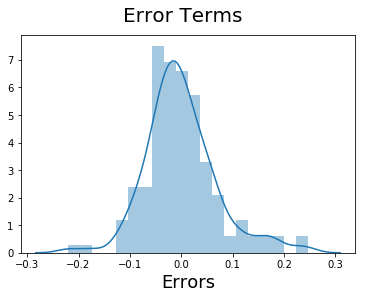

In [60]:
y_train_price = lm.predict(X_train_bu)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

This is an OK normal distribution.

Text(0, 0.5, 'actual_price-pred_price')

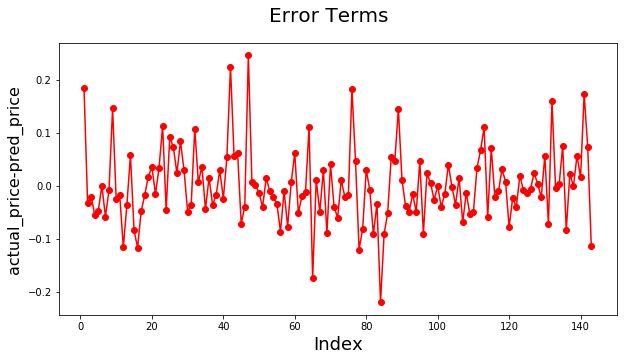

In [61]:
# Error terms
c = [i for i in range(1,144,1)] # We have 143 entries in training data.
fig = plt.figure(figsize=(10,5))
plt.plot(c,(y_train - y_train_price), color="red", marker='o')#, linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('actual_price-pred_price', fontsize=16)  

The error-terms are somewhat randomly distributed as well.

Let's now predict how does the linear model does on the test-set.

In [62]:
# Scaling the test-data.
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
y_test = df_test.pop('price') # dependent variable.
X_test = df_test # independent variable.

In [64]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test.
# For lm. The first linear model.
X_test_new = X_test[['horsepower','premium', 'wheelbase']]

# Adding a constant variable.
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions.
y_pred = lm.predict(X_test_new)

Calculating R-squred on test data.

In [66]:
RSS = (y_test - y_pred).apply(lambda x: x**2).sum() # Residual sum of Squares.
TSS = (y_test - y_test.mean()).apply(lambda x: x**2).sum() # Total sum of Squares.
R_sq = 1 - (RSS/TSS)
R_sq

0.8497106617474899

So from 89.1% fit on train data to a 84.9% fit on test data. This is acceptable.

Text(0, 0.5, 'y_pred')

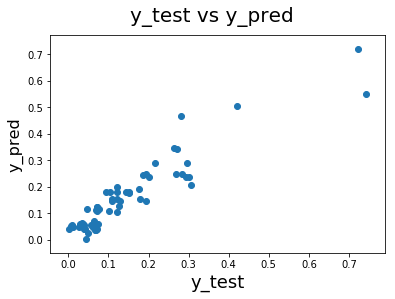

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

A somewhat linear relation between prediction and actual data, which is good. Line has a 45° bent, which is good.

Let's check VIF now. VIF>5 needs to be scrutinized.

In [68]:
X_train_new = X_train_bu.drop(['const'], axis=1)

In [69]:
# Calculate the VIFs for the model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,3.75
2,wheelbase,3.06
1,premium,1.60


These VIF's are fine.<br> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Let's create a 2nd model now, by adding `enginelocation_isrear` to first model.

In [70]:
X_train_bu_2 = pd.concat([X_train_bu, X_train['enginelocation_isrear']], axis = 1)

In [71]:
# Adding a constant variable.
import statsmodels.api as sm  
X_train_bu_2 = sm.add_constant(X_train_bu_2)

In [72]:
lm_2 = sm.OLS(y_train,X_train_bu_2).fit() # Running the linear model.

#Let's see the summary of our linear model.
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.80e-68
Time:                        19:46:43   Log-Likelihood:                 184.38
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     138   BIC:                            -343.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [73]:
X_train_new = X_train_bu_2.drop(['const'], axis=1)

In [74]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.41
2,wheelbase,3.71
1,premium,1.73
3,enginelocation_isrear,1.44


In [75]:
df.groupby('enginelocation_isrear')['CarName'].count()

enginelocation_isrear
0    202
1      3
Name: CarName, dtype: int64

<b>Only 3 cars have rear engine location in data. Can remove this variable. Also, generally german manufacturers that make high-performance vehicles keep engine location as rear. So, it's safe to say those high-performance cars will cost more and be of premium category as well.</b>

In [76]:
df['enginelocation_isrear'].corr(df['premium'])

0.3346714067485454

30% is not a good-correlation, but it is an OK correlation. `enginelocation_isrear` can be dropped from model.

Also, performance-jump in R-squared isn't much. 88.9 to 89.9, only 1%.<br> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

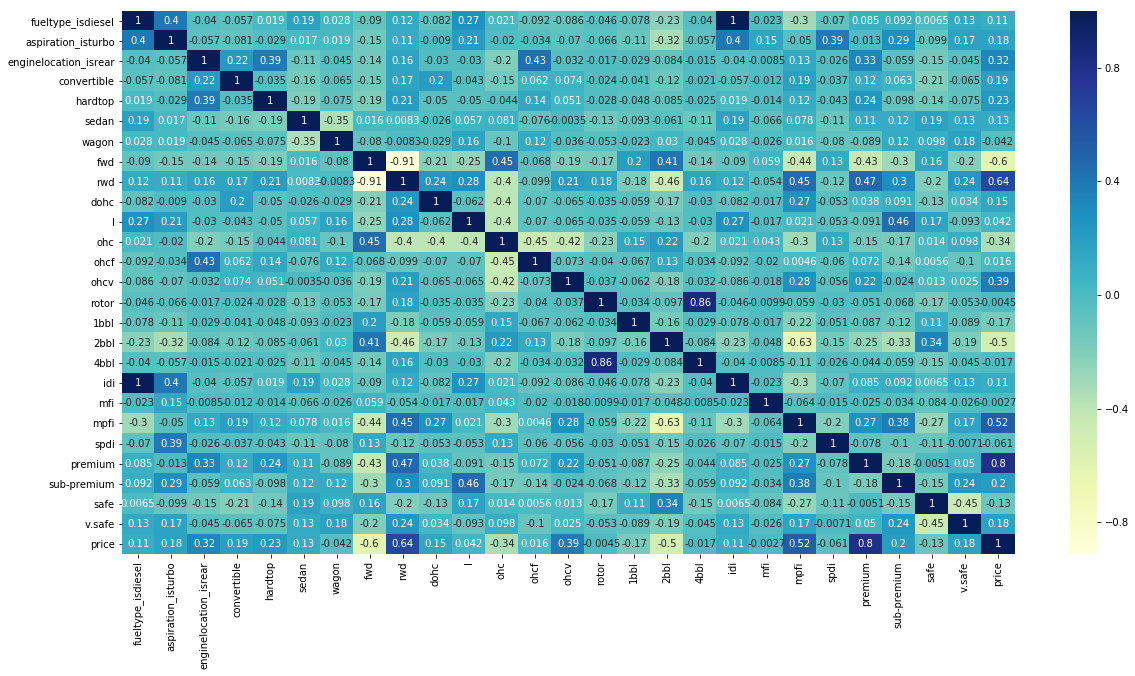

In [77]:
# Let's check the correlation coefficients to see which categorical variables are highly correlated with price.

plt.figure(figsize = (20, 10))
sns.heatmap(pd.concat([df_cat, df['price']], axis=1).corr(), annot = True, cmap="YlGnBu")
plt.show()

<br> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Creating a 3rd model. Starting with only `premium` as a variable.

In [78]:
X_train_bu_3 = X_train['premium']

In [79]:
# Adding a constant variable. 
import statsmodels.api as sm  
X_train_bu_3 = sm.add_constant(X_train_bu_3)

In [80]:
lm_3 = sm.OLS(y_train,X_train_bu_3).fit() # Running the linear model.

#Let's see the summary of our linear model.
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     274.0
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           7.33e-35
Time:                        19:46:48   Log-Likelihood:                 95.625
No. Observations:                 143   AIC:                            -187.2
Df Residuals:                     141   BIC:                            -181.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1582      0.011     14.053      0.0

Adjusted R-squared of 65%, high t-statistic of 16, 0 p-value. Good start for a model.

Adding variable `rwd` to 3rd model.

In [81]:
X_train_bu_3 = pd.concat([X_train_bu_3, X_train['rwd']], axis = 1)

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_bu_3 = sm.add_constant(X_train_bu_3)

In [83]:
lm_3 = sm.OLS(y_train,X_train_bu_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           6.20e-41
Time:                        19:46:48   Log-Likelihood:                 113.01
No. Observations:                 143   AIC:                            -220.0
Df Residuals:                     140   BIC:                            -211.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1159      0.012      9.573      0.0

Adjusted R-squared jumps to 73% from 65. t-statistic and p-values are good as well.

Adding a 3rd variable `ohcv` to model.

In [84]:
X_train_bu_3 = pd.concat([X_train_bu_3, X_train['ohcv']], axis = 1)

In [85]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_bu = sm.add_constant(X_train_bu_3)

In [86]:
lm_3 = sm.OLS(y_train,X_train_bu_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.34e-43
Time:                        19:46:49   Log-Likelihood:                 122.18
No. Observations:                 143   AIC:                            -236.4
Df Residuals:                     139   BIC:                            -224.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.011      9.638      0.0

Slight increase of 1% in adjusted R-squared.

In [87]:
X_train_new = X_train_bu_3.drop(['const'], axis=1)

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,rwd,1.58
0,premium,1.52
2,ohcv,1.09


VIF's are OK.

<br> ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Creating a fourth model. Adding `mpfi` on top of 3rd model.

In [89]:
X_train_bu_4 = pd.concat([X_train_bu_3, X_train['mpfi']], axis = 1)

In [90]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_bu_4 = sm.add_constant(X_train_bu_4)

In [91]:
lm_4 = sm.OLS(y_train,X_train_bu_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     140.4
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.28e-47
Time:                        19:46:49   Log-Likelihood:                 134.51
No. Observations:                 143   AIC:                            -259.0
Df Residuals:                     138   BIC:                            -244.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0836      0.012      7.090      0.0

Adjusted R-squared increases slightly from 76 to <b>79.7%.

Text(0.5, 0, 'Errors')

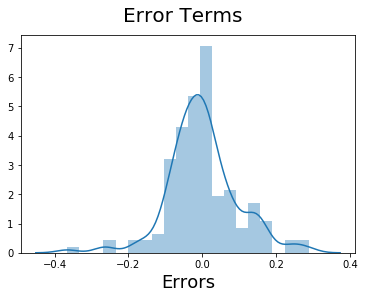

In [92]:
y_train_price = lm_4.predict(X_train_bu_4)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                

<font color='red'>The error terms are somewhat normally distributed, with squiggly and wide tail. Error normality of 1st linear model was better.

In [93]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
# For lm_4. Our 4th linear model.
X_test_new = X_test[['premium', 'rwd', 'ohcv', 'mpfi']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [94]:
# Making predictions
y_pred = lm_4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

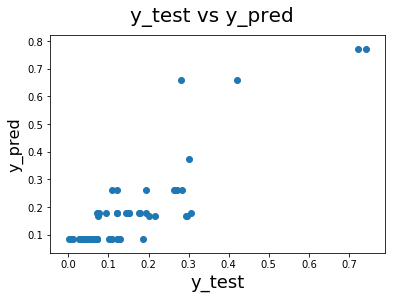

In [95]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

<font color='red'>It is clear by comparing the graph above and corresponding graph of 1st model, that 1st model does a better job at predicting. The 1st model is simple as well.

In [96]:
X_train_new = X_train_bu_4.drop(['const'], axis=1)

In [97]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,rwd,2.43
3,mpfi,2.10
0,premium,1.52
2,ohcv,1.17


<font size = 5><b> The final conclusion is that 1st model <font size=10>`lm`</font> is simple, and does a good job of fitting data, and prediction as well, with Adjusted R-squared of 88.9%.</b></font>

The features selected for that model are `horsepower`, `premium` (a derived variable which is categorical. whether car company is of premium range or not, like porsche, bmw, etc.) and `wheelbase`.

All these variables drive up the price, the first two variables are self-explanatory. <br>Let's see the 3rd variable now. Wheelbase is distance between front and real wheels of a car. Thus, Higher `wheelbase` means a longer car length and a bigger chassis, which means more cost. If we compare sedans and hatchbacks, sedans are more expensive as well as they are longer, which means they have a higher wheelbase.